# Perceptrón
Para la primer parte, se programa el algoritmo del perceptrón para el caso bidimensional.

In [ ]:
# Para esta práctica solo requeriremos el uso de NumPy para el manejo de álgebra
# lineal t matplotlib para graficar.
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

# Debido a que realizaremos animaciones, requerimos importar el subpaquete de
# animation, además requeriremos `functools` para crear funciones parciales y
# `typing` para crear el signature de los métodos.
from matplotlib import animation
from functools import partial
from typing import Tuple

# Para ver animaciones en Jupyter Notebooks
from IPython.display import HTML

## Datasets

Dado que queremos un dataset linealmente separable, la opción más sencilla es ocupar el eje $X$ como barrera de separación; sin embargo, para evitar la monotonía de tener el mismo dataset, sería bueno usar una matriz de rotación para girar nuestro espacio y agregar un sesgo que descentralice los dados. Para ello, siga los siguientes pasos:


1.   Puntos positivos y negativos de manera aleatoria.
2.   Un ángulo $\theta$ en radianes y gire el espacio usando la matriz de rotación.
$$
R = \left(\begin{array}{cc}
\cos(\theta) & -\sin(\theta) \\
\sin(\theta) & \cos(\theta)
\end{array}\right)
$$
3.   Agregue un sesgo aleatorio.



In [ ]:
def linear_dataset(n_samples: int) -> Tuple[np.ndarray, np.ndarray]:
  X = np.random.uniform(-1, 1, (n_samples, 2))
  y = np.where(X[:, 1] > 0, 1, -1)

  theta = np.random.uniform(-np.pi, np.pi)
  R = np.array([
        [np.cos(theta), -np.sin(theta)],
        [np.sin(theta), np.cos(theta)]
      ])
  X = X @ R.T + 2 * np.random.randn(2)

  return X, y

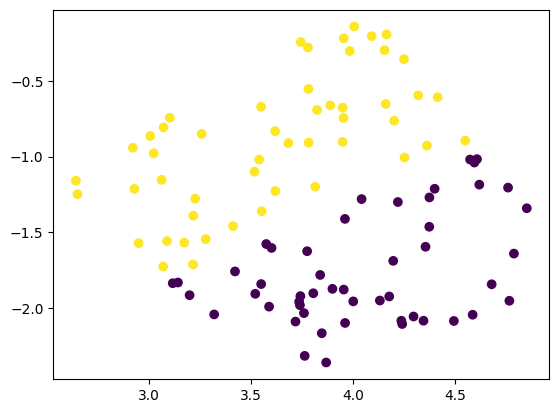

In [ ]:
X, y = linear_dataset(100)
plt.scatter(X[:, 0], X[:, 1], c=y)

Para el dataset no lineal podríamos usar una versión del XOR con ayuda de los cuadrantes del plano.

In [ ]:
def nonlinear_dataset(n_samples: int) -> Tuple[np.ndarray, np.ndarray]:
  X = np.random.uniform(-1, 1, (n_samples, 2))
  y = np.where(X[:, 0] * X[:, 1] > 0, 1, -1)

  theta = np.random.uniform(-np.pi, np.pi)
  R = np.array([
        [np.cos(theta), -np.sin(theta)],
        [np.sin(theta), np.cos(theta)]
      ])
  X = X @ R.T + 2 * np.random.randn(2)

  return X, y

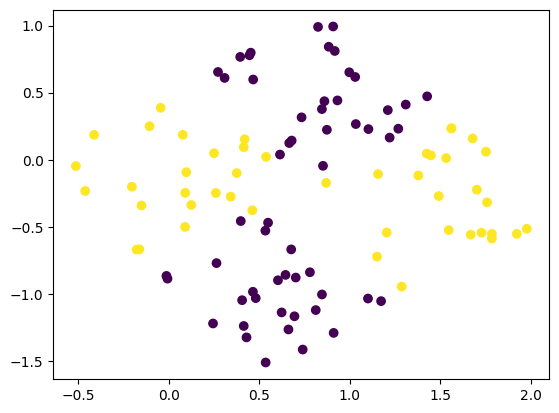

In [ ]:
X, y = nonlinear_dataset(100)
plt.scatter(X[:, 0], X[:, 1], c=y)

## Perceptrón

In [ ]:
class Perceptron:
  # Inicializamos el parámetro `w` (vector de dos dimensiones) de manera aleatoria entre (-1, 1) t el bias `b` lo asignamos a 0
  def __init__(self, alpha: float = 1.0) -> None:
    self.W = np.random.randn(2)
    self.b = np.array(0)
    self.alpha = alpha

  # Sobreescribimos el operador call de la clase para que nos regrese la predicción.
  def __call__(self, x: np.ndarray) -> np.ndarray:
    return np.sign(self.W @ x.T + self.b)

  # Creamos un método que actualice los parámetros usando.
  def update(self, x: np.ndarray, y: np.ndarray, p: np.ndarray) -> None:
    self.W = self.W + self.alpha * (y - p) * x.T
    self.b = self.b + self.alpha * (y - p)

  # Creamos un método de ayuda que itere sobre todos los puntos.
  def train_step(self, X: np.ndarray, y: np.ndarray) -> None:
    for xi, yi in zip(X, y):
      p = self.__call__(xi)
      self.update(xi, yi, p)

  # Creamos un método que nos regrese el límite de decisión.
  def decision_boundary(self, xmin, xmax) -> Tuple[np.ndarray, np.ndarray]:
    plot_x = np.linspace(xmin, xmax, 20)
    plot_y = -(self.W[0] * plot_x + self.b) / self.W[1]
    return plot_x, plot_y

## Entrenamiento

In [ ]:
def animate(t: int, model: Perceptron, X: np.ndarray, y: np.ndarray, ax) -> None:
  ax.clear()
  ax.scatter(X[:, 0], X[:, 1], c=y)
  ax.axis([np.min(X[:, 0]), np.max(X[:, 0]), np.min(X[:, 1]), np.max(X[:, 1])])

  plot_x, plot_y = model.decision_boundary(np.min(X[:, 0]), np.max(X[:, 0]))
  ax.plot(plot_x, plot_y)

  model.train_step(X, y)

Probramos en el dataset lineal:

In [ ]:
fig, ax = plt.subplots()
X, y = linear_dataset(100)
model = Perceptron(0.1)
anim = FuncAnimation(fig, partial(animate, model=model, X=X, y=y, ax=ax), frames=30)
plt.close()
HTML(anim.to_jshtml())

Probramos en el dataset no lineal:

In [ ]:
fig, ax = plt.subplots()
X, y = nonlinear_dataset(100)
model = Perceptron(0.1)
anim = FuncAnimation(fig, partial(animate, model=model, X=X, y=y, ax=ax), frames=30)
plt.close()
HTML(anim.to_jshtml())